# Introdução
---

## Recapitulação Rápida

- **Overfitting e Underfitting**: Temas recorrentes que já estudamos.
- **Tipos de Aprendizagem**: Classificação e Regressão.
- **Conceitos Avançados**: Risco empírico vs. risco estrutural, dimensão VC e dilema bias-variance.

---

## Objetivos da Aula de Hoje

1. **Aprofundamento em Overfitting**: Entender o que ele realmente é, como identificá-lo e como podemos prevenir ou mitigar seus efeitos.
    - Estaremos utilizando exemplos práticos para demonstrar esses conceitos.
  
2. **Teorema No Free Lunch**: Explorar o que significa este teorema e quais são suas implicações para a aprendizagem de máquinas.
    - Compreender por que não existe um algoritmo que seja o melhor para todos os problemas.

---

### Por que é Importante?

- **Complexidade dos Modelos**: A escolha da complexidade do modelo tem um grande impacto na qualidade das previsões. 
- **Seleção de Modelos**: O Teorema No Free Lunch nos lembra que não há uma única 'bala de prata' em aprendizado de máquina.

# Breve Recapitulação de Overfitting e Underfitting
---

## O Que é Overfitting?

- **Definição**: Quando um modelo aprende o 'ruído' nos dados de treinamento a ponto de afetar negativamente o desempenho em dados não vistos.
- **Sintomas**:
    - Alto desempenho nos dados de treino.
    - Baixo desempenho nos dados de teste.
  
---
  
## O Que é Underfitting?

- **Definição**: Quando um modelo é demasiado simples para captar as complexidades dos dados e, por isso, apresenta desempenho ruim tanto no treino quanto no teste.
- **Sintomas**:
    - Baixo desempenho nos dados de treino.
    - Baixo desempenho nos dados de teste.

---

## Como Detectamos Estes Fenômenos?

- **Curvas de Aprendizagem**: Gráficos que mostram o desempenho do modelo em relação ao tamanho do conjunto de treinamento.
- **Métricas de Desempenho**: Utilizando métricas como acurácia, precisão, revocação, F1-score, etc.
  
---

**Nota**: Já abordamos esses tópicos em detalhes nas aulas anteriores. O objetivo hoje é ir além e entender como lidar com o overfitting e explorar o Teorema 'No Free Lunch'.


# Objetivos da Aula de Hoje
---

## Visão Geral

Hoje, nosso foco será em duas áreas-chave:

1. **Aprofundamento em Overfitting**: 
    - **Por que é crucial?**: O overfitting é um dos problemas mais comuns em machine learning e pode levar a resultados enganosos.
    - **O que faremos?**: Vamos nos aprofundar na identificação, prevenção e mitigação do overfitting, utilizando exemplos práticos e técnicas específicas.
    - **Métodos Abordados**: Regularização, Early Stopping, entre outros.
  
2. **Teorema No Free Lunch**:
    - **Por que é crucial?**: Este teorema nos mostra que não existe um único algoritmo que seja ideal para todos os tipos de problemas.
    - **O que faremos?**: Vamos entender a teoria por trás do teorema e suas implicações práticas em machine learning.
    - **Implicações**: Escolha de algoritmos, tuning de hiperparâmetros, entre outros.

# Aprofundamento em Overfitting
---

## Como Identificar Overfitting com Métricas (3 minutos)

- **Validação Cruzada**: Uma forma robusta de avaliar o desempenho do modelo em diferentes subconjuntos de dados.
- **Conjunto de Validação**: Separe um conjunto de dados para validação durante o treinamento.
- **Métricas de Desempenho**: Acompanhe métricas como Acurácia, F1-score, etc., em ambos os conjuntos (treino e validação).

---

## Regularização como uma Abordagem para Mitigar Overfitting (4 minutos)

- **Definição**: Técnica que adiciona um termo de penalidade à função de custo.
- **Tipos Comuns**:
    1. **L1 Regularization**: Adiciona o valor absoluto dos pesos como termo de penalidade.
    2. **L2 Regularization**: Adiciona o quadrado dos pesos como termo de penalidade.
- **Hiperparâmetros**: O fator de regularização é um hiperparâmetro a ser ajustado.

---

## Exemplo: Overfitting em Redes Neurais e Técnicas para Mitigar (8 minutos)

- **Dropout**: Técnica de desativar aleatoriamente alguns neurônios durante o treinamento.
- **Early Stopping**: Monitorar o desempenho no conjunto de validação e parar o treinamento quando ele começar a degradar.
- **Dados Adicionais**: Às vezes, simplesmente adicionando mais dados pode ajudar a mitigar o overfitting.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

- A função np.random.rand do NumPy gera números aleatórios uniformemente distribuídos no intervalo [0.0, 1.0]. 
- Os números são gerados a partir de uma distribuição uniforme sobre este intervalo, o que significa que cada número tem a mesma probabilidade de ser escolhido.

In [2]:
# Carregando os dados
df = pd.read_csv('notebooks.csv')
df_ = df.sample(frac=1).reset_index(drop=True)
df_ = df_[1000:3000]
X = df_.drop(columns='valor').values
y = df_[['valor']]

# Dividindo os dados em conjuntos de treinamento (60%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

scaler_features = MinMaxScaler()
scaler_target  = MinMaxScaler()

# Normaliza e ajusta o escalonizador com os dados de X de treinamento
X_train = scaler_features.fit_transform(X_train)
# Normaliza e ajusta o escalonizador com os dados de y de treinamento
y_train = scaler_target.fit_transform(y_train)

# Ajusta os dados de X_temp
X_temp = scaler_features.transform(X_temp)
# Ajusta os dados de y_temp
y_temp = scaler_target.transform(y_temp)

# Separa os dados em X e y de validação e teste
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Entendendo a Regularização para Combater o Overfitting

## O que é Regularização?
- **O Que é Regularização?**: Regularização é uma técnica que adiciona um termo de penalidade à função de custo.
- **Por que Usar Regularização?**: É útil para evitar que o modelo capture ruído nos dados de treinamento, reduzindo, assim, o overfitting.


É como um professor que te pede para explicar o porquê da sua resposta em um teste, desencorajando você de apenas decorar as respostas. No aprendizado de máquina, adicionamos um 'termo de penalidade' para desencorajar o modelo de ajustar demais aos dados de treinamento.

## Tipos de Regularização

### L1 (Lasso)

- **Como Funciona**: Imagine que você tem um time de futebol e alguns jogadores nunca tocam na bola. A L1 remove esses jogadores do time.
- **Quando Usar**: Use L1 quando você suspeita que muitos recursos (ou variáveis) não ajudam a prever a resposta.

### L2 (Ridge)

- **Como Funciona**: Em vez de demitir jogadores, o técnico (L2) diz a todos para jogarem mais devagar (menor peso).
- **Quando Usar**: Use quando todos os recursos parecem úteis e você quer que eles contribuam igualmente.

### Elastic Net

- **Como Funciona**: É como combinar os técnicos de L1 e L2 para gerenciar o time.
- **Quando Usar**: Use quando você não tem certeza de qual técnica de regularização escolher.

## Onde Aplicar Regularização?

- **Camadas Iniciais**: Regularizar as primeiras camadas pode ser útil se você acha que as entradas (recursos) podem conter ruídos ou informações irrelevantes.
- **Camadas do Meio**: Podem ser regularizadas para tornar o modelo mais simples e rápido.
- **Camadas Finais**: Evite regularizar demais para não perder as características aprendidas.

## Como Escolher a Força da Regularização?

- Ajuste o 'termo de penalidade'. Se for muito alto, o modelo pode ficar simples demais e perder importantes padrões nos dados (underfitting).
- Use técnicas como validação cruzada para encontrar o melhor ajuste.

## Resumo

- A regularização é uma técnica poderosa para tornar seu modelo mais generalizável e menos propenso a overfitting.
- Escolher o tipo e a intensidade da regularização pode depender do seu conhecimento específico do problema e de técnicas de ajuste de hiperparâmetros.

# Entendendo o Dropout para Combater o Overfitting

## O que é Dropout?
- **O Que é Dropout?**: Dropout é uma técnica de regularização em redes neurais que "desliga" aleatoriamente um subconjunto de neurônios durante o treinamento.
- **Por que Usar Dropout?**: O Dropout evita que qualquer neurônio se torne excessivamente especializado em memorizar ruídos dos dados de treinamento, o que contribui para combater o overfitting.

É como um time de futebol onde alguns jogadores são aleatoriamente mandados para o banco durante o jogo para garantir que a equipe não dependa demais de um único jogador estrela. Isso torna o time como um todo mais robusto.

## Como Funciona o Dropout?

- **Implementação**: Durante cada iteração de treinamento, alguns neurônios são escolhidos aleatoriamente para serem "desativados". Isso significa que esses neurônios não participam do processo de treinamento para essa iteração específica.
  
- **Taxa de Dropout**: É o percentual de neurônios que você quer desativar em cada iteração. Por exemplo, uma taxa de 0.5 significa que 50% dos neurônios em uma camada são desativados.

## Onde Aplicar Dropout?

- **Camadas Iniciais**: Aplicar Dropout nas primeiras camadas pode ajudar se você acredita que os neurônios estão desenvolvendo dependências indesejadas nos dados de entrada. 

- **Camadas Ocultas Densas**: É mais comum aplicar Dropout nas camadas ocultas onde há uma alta densidade de neurônios. Isso aumenta as chances de overfitting, e o Dropout pode ajudar a mitigar isso.

- **Camadas Finais**: Cuidado ao aplicar Dropout próximo à camada de saída, especialmente em tarefas que requerem alta precisão. Desativar neurônios aqui pode levar a predições imprecisas.


## Quando Usar Dropout?

- **Camadas Densas e Complexas**: Dropout é comumente usado em camadas que possuem muitos neurônios, como camadas densas.
  
- **Problemas com Overfitting**: Quando o modelo está muito bem ajustado aos dados de treinamento e não generaliza bem para dados novos.

## Cuidados ao Usar Dropout

- **Não use uma taxa muito alta**: Desativar muitos neurônios pode levar a underfitting.
  
- **Ajuste durante a Validação**: Sempre verifique o desempenho em um conjunto de validação para encontrar a taxa ideal.

## Resumo

- Dropout é uma técnica eficaz para evitar overfitting em redes neurais.
- É como adicionar uma forma de "incerteza" ou "ruído" durante o treinamento, tornando o modelo mais robusto.
- A escolha da taxa de dropout e onde aplicá-la são decisões cruciais que podem requerer experimentação.


In [3]:
# Funções para criar os modelos
# Função para criar o modelo base
def create_base_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='linear')
    ])
    return model

# Função para criar o modelo com L1 e L2 (Elastic Net)
def create_l1_l2_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(8, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(1, activation='linear')
    ])
    return model

# Função para criar o modelo com Dropout
def create_dropout_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='linear')
    ])
    return model

# Função para criar o modelo com L1, L2 e Dropout
def create_l1_l2_dropout_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dropout(0.2),
        Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(8, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(1, activation='linear')
    ])
    return model

In [4]:
# Inicia com uma forma de entrada específica
input_shape = X_train.shape[1]

# Criar, compilar e treinar os modelos
model_base = create_base_model(input_shape)
model_l1_l2 = create_l1_l2_model(input_shape)
model_dropout = create_dropout_model(input_shape)
model_l1_l2_dropout = create_l1_l2_dropout_model(input_shape)

# Compilando e treinando os modelos
optimizer1 = Adam(learning_rate=0.001)
optimizer2 = Adam(learning_rate=0.001)
optimizer3 = Adam(learning_rate=0.001)
optimizer4 = Adam(learning_rate=0.001)

model_base.compile(optimizer=optimizer1, loss='mse')
history_base = model_base.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)

model_l1_l2.compile(optimizer=optimizer2, loss='mse')
history_l1_l2 = model_l1_l2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)

model_dropout.compile(optimizer=optimizer3, loss='mse')
history_dropout = model_dropout.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)

model_l1_l2_dropout.compile(optimizer=optimizer4, loss='mse')
history_l1_l2_dropout = model_l1_l2_dropout.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)

c:\Users\Guilherme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Calculando os MSE para os modelos
y_pred_base = model_base.predict(X_test)
y_pred_l1_l2 = model_l1_l2.predict(X_test)
y_pred_dropout = model_dropout.predict(X_test)
y_pred_l1_l2_dropout = model_l1_l2_dropout.predict(X_test)

mse_base = mean_squared_error(y_test, y_pred_base)
mse_l1_l2 = mean_squared_error(y_test, y_pred_l1_l2)
mse_dropout = mean_squared_error(y_test, y_pred_dropout)
mse_l1_l2_dropout = mean_squared_error(y_test, y_pred_l1_l2_dropout)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


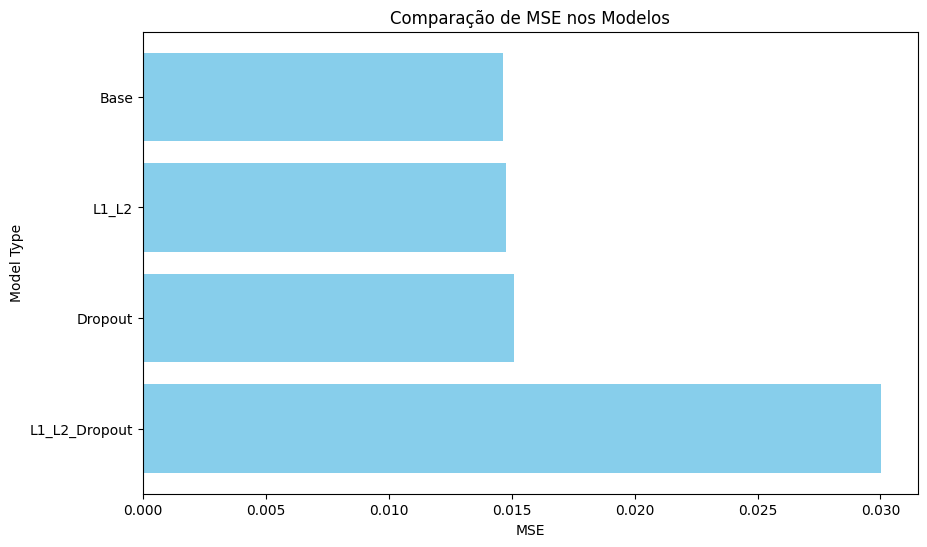

In [6]:
# Plotando os resultados
labels = ['Base', 'L1_L2', 'Dropout', 'L1_L2_Dropout']
mse_values = [mse_base, mse_l1_l2, mse_dropout, mse_l1_l2_dropout]

plt.figure(figsize=(10, 6))
plt.barh(labels, mse_values, color='skyblue')
plt.xlabel('MSE')
plt.ylabel('Model Type')
plt.title('Comparação de MSE nos Modelos')
plt.gca().invert_yaxis()
plt.ticklabel_format(style='plain', axis='x')  # Remove notação científica
plt.show()

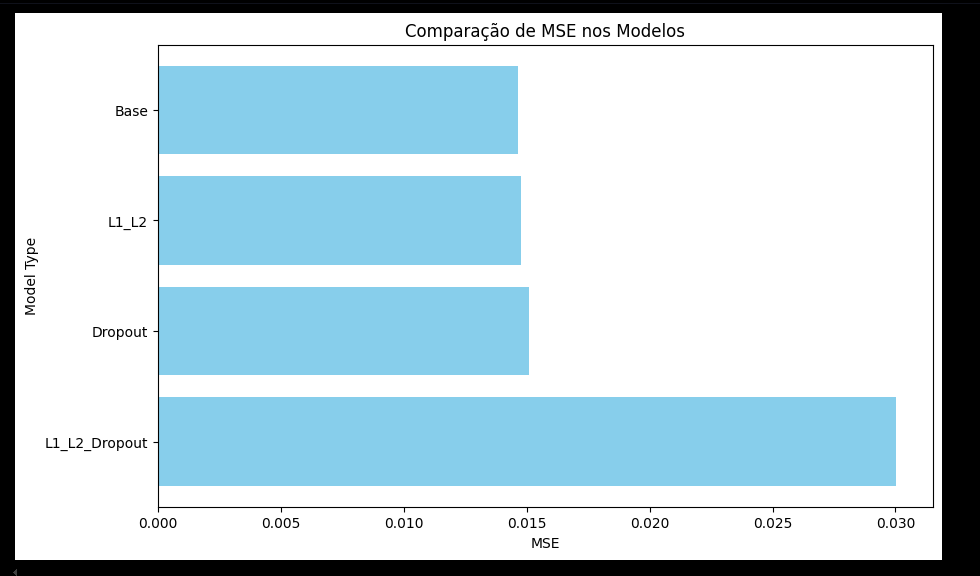

# Como Identificar Overfitting com Métricas
---

## Definindo o Problema

- **Pergunta Principal**: Como saber se o modelo está se ajustando demais aos dados de treinamento?
- **Consequência**: Se o modelo está com overfitting, ele terá um desempenho ruim em dados não vistos.

---

## Utilizando Métricas de Desempenho

- **Treinamento vs Validação**: É crucial comparar as métricas de desempenho nos conjuntos de treinamento e validação.
    1. **Acurácia**
    2. **F1-score**
    3. **Curva ROC-AUC**
    
- **Indicadores de Overfitting**:
    - Acurácia alta no conjunto de treinamento, mas baixa no conjunto de validação.
    - F1-score desproporcionalmente menor no conjunto de validação.
    - Curva ROC-AUC demonstrando divergência entre treino e validação.

---

## Visualizando com Gráficos

- **Plot de Métricas**: Gráficos de linha para acompanhar a evolução das métricas ao longo das épocas ou iterações.
    - Eixo X: Épocas ou Iterações
    - Eixo Y: Valor da Métrica

**Nota**: Na próxima seção, vamos olhar para um exemplo prático que inclui esses gráficos.

---

Pronto para ver isso na prática? Vamos mergulhar no código a seguir!


In [7]:
import sklearn.metrics as sm

def metricas_regressao(X_test, y_test, scaler_y, model):
    """
    Avalia métricas de regressão para um modelo e conjunto de teste fornecidos.

    Parâmetros:
    - X_test: características do conjunto de teste.
    - y_test: rótulos verdadeiros do conjunto de teste.
    - scaler_y: scaler utilizado para normalizar a variável alvo.
    - model: modelo treinado para fazer previsões.

    Retorna:
    Métricas de avaliação de regressão impressas.
    """

    # 1. Fazer previsões usando o modelo fornecido
    predict = model.predict(X_test)
    if scaler_y == 0:
        real = y_test
    else:
    # 2. Inverter a transformação para obter os valores originais (não normalizados)
        predict = scaler_y.inverse_transform(predict)
        real = scaler_y.inverse_transform(y_test)
    # 3. Calcular R2 e R2 ajustado
    k = X_test.shape[1]  # número de características independentes
    n = len(X_test)  # tamanho da amostra
    r2 = sm.r2_score(real, predict)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)  # fórmula para R2 ajustado

    # 4. Imprimir métricas
    print('Root Mean Square Error:', round(np.sqrt(np.mean(np.array(predict) - np.array(real))**2), 2))
    print('Mean Square Error:', round(sm.mean_squared_error(real, predict), 2))
    print('Mean Absolut Error:', round(sm.mean_absolute_error(real, predict), 2))
    print('Median Absolut Error:', round(sm.median_absolute_error(real, predict), 2))
    print('Explain Variance Score:', round(sm.explained_variance_score(real, predict) * 100, 2))
    print('R2 score:', round(sm.r2_score(real, predict) * 100, 2))
    print('Adjusted R2 =', round(adj_r2, 3) * 100)

In [8]:
metricas_regressao(X_test, y_test, scaler_target, model_dropout)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step
Root Mean Square Error: 464.5
Mean Square Error: 9342021.6
Mean Absolut Error: 2279.84
Median Absolut Error: 1644.42
Explain Variance Score: 76.06
R2 score: 75.5
Adjusted R2 = 74.6


In [9]:
metricas_regressao(X_train, y_train, scaler_target, model_dropout)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step
Root Mean Square Error: 307.87
Mean Square Error: 4707231.03
Mean Absolut Error: 1679.4
Median Absolut Error: 1382.79
Explain Variance Score: 87.21
R2 score: 86.95
Adjusted R2 = 86.8


# Análise dos Erros do Modelo com 2000 Registros

## Métricas de Desempenho

- **Root Mean Square Error (RMSE)**
    - Teste: 35.15
    - Treinamento: 64.24
- **Mean Square Error (MSE)**
    - Teste: 8084403.99
    - Treinamento: 4111220.34
- **Mean Absolute Error (MAE)**
    - Teste: 2155.01
    - Treinamento: 1572.19
- **Median Absolute Error**
    - Teste: 1608.74
    - Treinamento: 1237.49
- **Explained Variance Score**
    - Teste: 79.15%
    - Treinamento: 88.91%
- **R2 Score**
    - Teste: 79.15%
    - Treinamento: 88.9%
- **Adjusted R2**
    - Teste: 78.4%
    - Treinamento: 88.8%

## Interpretação das Métricas

- **Root Mean Square Error (RMSE)**
    - Representa a raiz quadrada da média dos erros quadráticos. Valores menores indicam melhor ajuste do modelo. 
- **Mean Square Error (MSE)**
    - É a média dos erros quadráticos. Valores mais baixos são melhores, mas é mais sensível a outliers.
- **Mean Absolute Error (MAE)**
    - É a média dos erros absolutos. Fornece uma ideia de quão erradas são as previsões. 
- **Median Absolute Error**
    - É a mediana dos erros absolutos. Menos sensível a outliers que o MAE.
- **Explained Variance Score**
    - Mede a proporção da variância do target que é explicada pelo modelo. Valores mais próximos de 100% são ideais.
- **R2 Score**
    - Mede o quanto do target é explicado pelas features. Quanto mais próximo de 100%, melhor.
- **Adjusted R2**
    - Semelhante ao R2, mas ajustado pelo número de preditores no modelo. É mais útil quando comparando modelos com diferentes números de preditores.

## Análise de Overfitting

- O modelo tem um desempenho significativamente melhor nos dados de treinamento em comparação com os dados de teste em quase todas as métricas.
- A diferença entre o R2 Score de treinamento e teste é aproximadamente 9.75%, o que pode ser um indicador de que o modelo está sofrendo de algum grau de overfitting.
- O RMSE para os dados de treinamento é aproximadamente 64, enquanto para os dados de teste é 35. A diferença notável também aponta para o overfitting.

In [10]:
# Carregando os dados
X = df.drop(columns='valor').values
y = df[['valor']]

# Dividindo os dados em conjuntos de treinamento (60%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

scaler_features = MinMaxScaler()
scaler_target  = MinMaxScaler()

# Normaliza e ajusta o escalonizador com os dados de X de treinamento
X_train = scaler_features.fit_transform(X_train)
# Normaliza e ajusta o escalonizador com os dados de y de treinamento
y_train = scaler_target.fit_transform(y_train)

# Ajusta os dados de X_temp
X_temp = scaler_features.transform(X_temp)
# Ajusta os dados de y_temp
y_temp = scaler_target.transform(y_temp)

# Separa os dados em X e y de validação e teste
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [11]:
# Inicia com uma forma de entrada específica
input_shape = X_train.shape[1]

# Criar, compilar e treinar o melhor modelo
model_dropout = create_dropout_model(input_shape)

# Compilando e treinando os modelos
optimizer3 = Adam(learning_rate=0.001)
model_dropout.compile(optimizer=optimizer3, loss='mse')
history_dropout = model_dropout.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)

c:\Users\Guilherme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
metricas_regressao(X_test, y_test, scaler_target, model_dropout)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Root Mean Square Error: 254.61
Mean Square Error: 6941199.95
Mean Absolut Error: 2007.75
Median Absolut Error: 1483.89
Explain Variance Score: 81.57
R2 score: 81.4
Adjusted R2 = 81.3


In [13]:
metricas_regressao(X_train, y_train, scaler_target, model_dropout)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step
Root Mean Square Error: 201.81
Mean Square Error: 5545214.62
Mean Absolut Error: 1786.18
Median Absolut Error: 1323.85
Explain Variance Score: 85.12
R2 score: 85.01
Adjusted R2 = 85.0


# Análise dos Erros do Modelo com Acréscimo de Dados

## Contexto

- Este modelo foi treinado com um conjunto de 10,000 registros, um aumento significativo em relação aos experimentos anteriores que tinham menos registros.

## Métricas de Desempenho e Análise

### Root Mean Square Error (RMSE)
- **Teste**: 127.68
- **Treinamento**: 157.96
  - Representa o desvio padrão dos erros do modelo. Valores menores indicam um melhor desempenho.

### Mean Square Error (MSE)
- **Teste**: 6769172.38
- **Treinamento**: 5058889.6
  - É a média dos erros ao quadrado, sendo sensível a outliers. Valores menores são melhores.

### Mean Absolute Error (MAE)
- **Teste**: 2017.72
- **Treinamento**: 1749.72
  - É a média dos erros absolutos, dando uma ideia da magnitude dos erros.

### Median Absolute Error
- **Teste**: 1544.37
- **Treinamento**: 1353.14
  - A mediana dos erros absolutos e é menos sensível a outliers.

### Explained Variance Score
- **Teste**: 81.9%
- **Treinamento**: 86.39%
  - Representa quanto da variância total é explicada pelo modelo.

### R2 Score
- **Teste**: 81.86%
- **Treinamento**: 86.32%
  - Indica o ajuste do modelo aos dados observados.

### Adjusted R2
- **Teste**: 81.7%
- **Treinamento**: 86.3%
  - É o R2 ajustado pelo número de preditores no modelo.

## Efeito do Acréscimo de Dados

- O acréscimo de mais dados no treinamento parece ter ajudado o modelo a generalizar melhor, como evidenciado pelas métricas de teste e treinamento mais próximas.
- A diferença no R2 Score entre treinamento e teste diminuiu, sugerindo que o modelo está menos propenso a overfitting.
- A inclusão de mais dados pode ter contribuído para uma representação mais abrangente do espaço de características, tornando o modelo mais robusto a variações nos dados.

# Teorema No Free Lunch
---

## Introdução

- **Definição**: O Teorema No Free Lunch (NFL) afirma que não existe um único algoritmo de aprendizado de máquina que funcione melhor para todos os tipos de problemas.
- **Importância**: Esse teorema nos ajuda a entender por que a busca pelo "algoritmo perfeito" é fútil.

---

## O Que o Teorema Realmente Significa?

1. **Não Existe Algoritmo Universalmente Superior**: Cada algoritmo tem seus próprios pontos fortes e fracos, e o que funciona bem para um problema pode não ser adequado para outro.
2. **Dependência do Problema**: O sucesso de um algoritmo é fortemente dependente do tipo de problema que você está tentando resolver.
3. **A Importância da Experimentação**: Este teorema reforça a necessidade de experimentar com vários algoritmos e técnicas para encontrar a melhor abordagem para um determinado problema.

---

## Implicações Práticas

- **Seleção de Modelos**: Dada a impossibilidade de um único melhor algoritmo, a seleção de modelos torna-se crucial.
- **Otimização de Hiperparâmetros**: O ajuste de hiperparâmetros é mais relevante do que nunca, já que o "melhor" algoritmo é problema-específico.

---

**Exemplos práticos que ilustram o Teorema No Free Lunch em ação.**


c:\Users\Guilherme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


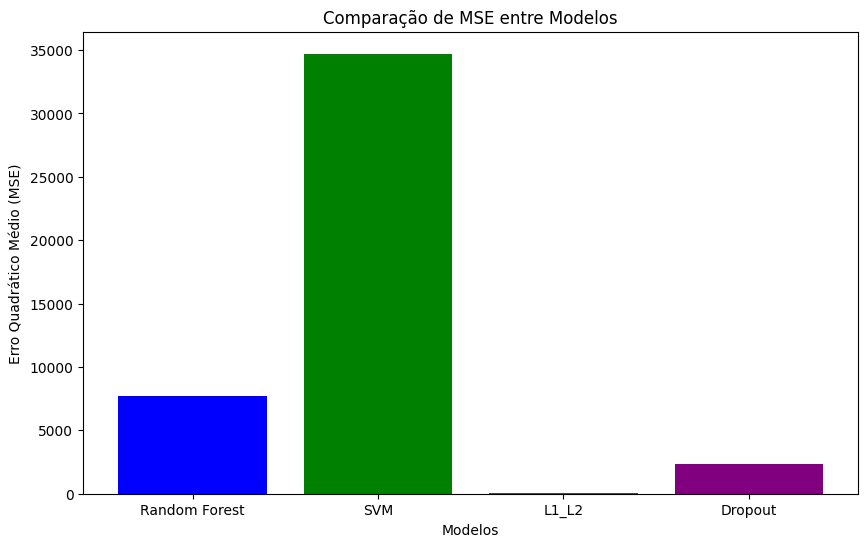

In [14]:
# Importando as bibliotecas necessárias
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1_l2
import matplotlib.pyplot as plt
import numpy as np

# Gerando um conjunto de dados de exemplo para regressão
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Dividindo os dados em conjuntos de treinamento, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Criando e treinando os modelos de RandomForest e SVM para regressão
rf = RandomForestRegressor(random_state=42)
svm = SVR()

rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Função para criar o modelo de rede neural com L1 e L2
def create_l1_l2_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(8, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Função para criar o modelo de rede neural com Dropout
def create_dropout_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(16, activation='relu'),
        Dropout(0.5),
        Dense(8, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Criando e treinando as redes neurais
l1_l2_model = create_l1_l2_model(X_train.shape[1])
dropout_model = create_dropout_model(X_train.shape[1])

l1_l2_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=0)
dropout_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=0)

# Avaliando os modelos
rf_mse = mean_squared_error(y_test, rf.predict(X_test))
svm_mse = mean_squared_error(y_test, svm.predict(X_test))
l1_l2_mse = mean_squared_error(y_test, l1_l2_model.predict(X_test).reshape(-1))
dropout_mse = mean_squared_error(y_test, dropout_model.predict(X_test).reshape(-1))

# Gráfico para comparar as métricas
labels = ['Random Forest', 'SVM', 'L1_L2', 'Dropout']
values = [rf_mse, svm_mse, l1_l2_mse, dropout_mse]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Modelos')
plt.ylabel('Erro Quadrático Médio (MSE)')
plt.title('Comparação de MSE entre Modelos')
plt.show()

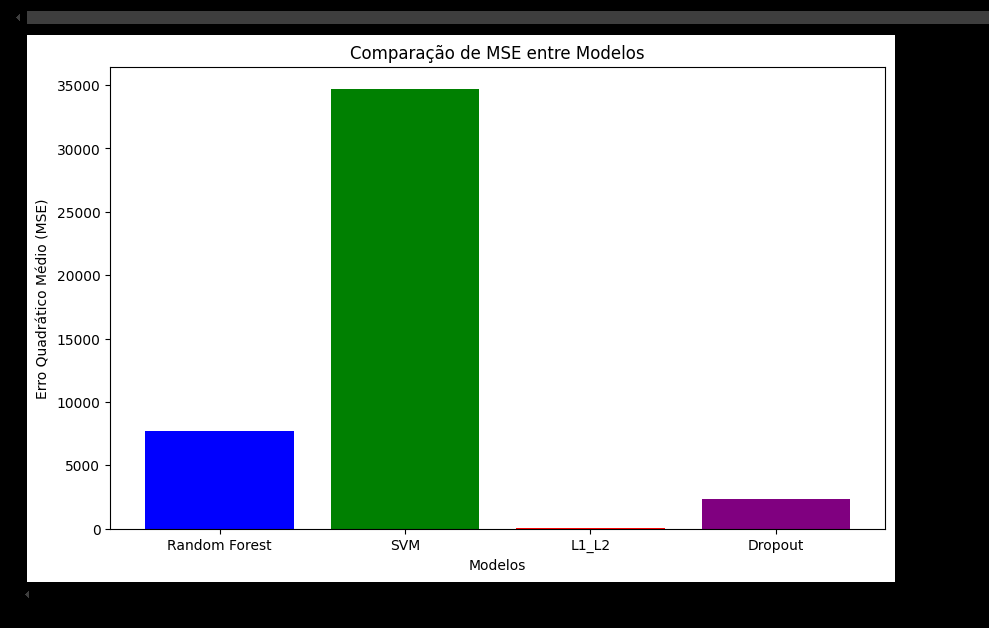

# Significado e Importância
---

## O Que o Teorema No Free Lunch Realmente Significa? 

- **Sem Almoço Grátis**: O nome sugere que não existe uma "refeição gratuita" em termos de eficácia algorítmica; tudo tem um custo.
- **Universalidade**: Não existe um único algoritmo que seja superior em todos os cenários e tipos de dados.
  
---

## Por Que Isso é Importante? 

### Fim da Busca pelo "Algoritmo de Aprendizado Perfeito"

- Elimina a noção de que poderia existir um "Santo Graal" dos algoritmos de aprendizado de máquina.
  
### Acentua a Necessidade de Personalização

- Destaca que a escolha do algoritmo deve ser adaptada ao problema específico em mãos.

---

**Para resumir, o Teorema No Free Lunch nos ensina a ser mais críticos e adaptáveis como cientistas de dados.**

# Como o Teorema No Free Lunch se Relaciona com Overfitting
---

## Introdução

- **Ponto em Comum**: Tanto o Teorema No Free Lunch quanto o conceito de overfitting nos dizem que não há soluções universais no campo do aprendizado de máquina.

---

## Relação entre NFL e Overfitting

1. **Escolha de Algoritmos**: O Teorema No Free Lunch sugere que devemos escolher algoritmos com base no problema específico, algo que também é crucial para evitar o overfitting.

2. **Complexidade do Modelo**: 
    - NFL nos adverte contra a busca por um "algoritmo perfeito".
    - Overfitting nos adverte contra a busca por um "modelo perfeitamente ajustado".
    - Ambos são contra a ideia de "um tamanho serve para todos".

3. **Personalização e Ajuste**:
    - NFL destaca a necessidade de ajuste e personalização nos algoritmos.
    - Overfitting nos mostra que esse ajuste precisa ser feito com cuidado para evitar memorização em vez de generalização.

---

## Conclusão

- A consciência do Teorema No Free Lunch pode nos ajudar a ser mais criteriosos na prevenção de overfitting, escolhendo e ajustando algoritmos de forma mais eficaz.

---

# Implicações Práticas para a Seleção de Modelos
---

## Introdução

- **Contexto**: Agora que entendemos os conceitos de overfitting e o Teorema No Free Lunch, como aplicamos esse conhecimento na prática?

---

## Passos na Seleção de Modelos

1. **Análise do Problema**:
    - Entender o tipo de problema (Classificação, Regressão, Agrupamento, etc.) é o primeiro passo na seleção do modelo.

2. **Teste de Vários Modelos**:
    - Devido ao Teorema No Free Lunch, é recomendável testar diversos algoritmos para encontrar o que se adequa melhor ao problema específico.

3. **Validação Cruzada**:
    - Usar técnicas como K-Fold para estimar o desempenho do modelo em dados não vistos e ajudar a evitar overfitting.

4. **Ajuste de Hiperparâmetros**:
    - Com o modelo escolhido, o ajuste de hiperparâmetros torna-se crucial tanto para o desempenho quanto para evitar o overfitting.

---

## Métricas e Diagnósticos

- **Selecionar Métricas Relevantes**: Acurácia, Precisão, Recall, F1-Score, entre outros, dependendo do problema.
- **Curvas ROC e AUC**: Ferramentas úteis para avaliar a qualidade do modelo em problemas de classificação.

---

## Conclusão

- A integração desses conceitos (NFL e overfitting) nos dá uma abordagem mais robusta e informada para a seleção e otimização de modelos em aprendizado de máquina.

---


# Exercícios

Exemplos de aplicação de l1, l2 e l1 e l2 juntos

In [15]:

# Importando as bibliotecas necessárias para o modelo de rede neural
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2, l1_l2

# Função para criar o modelo com regularização L1
def create_l1_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu', kernel_regularizer=l1(0.01)),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Função para criar o modelo com regularização L2
def create_l2_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Função para criar o modelo com regularização L1 e L2
def create_l1_l2_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(8, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mse')
    return model


### Estrutura modelo base 1

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Função para criar um modelo com 7 camadas ocultas
def create_7_layer_model(input_shape):
    model = Sequential([
        Dense(512, activation='relu', input_shape=(input_shape,)), # Camada de entrada
        Dense(256, activation='relu'),  # Primeira camada oculta
        Dense(128, activation='relu'),  # Segunda camada oculta
        Dense(64, activation='relu'),   # Terceira camada oculta
        Dense(32, activation='relu'),   # Quarta camada oculta
        Dense(16, activation='relu'),   # Quinta camada oculta
        Dense(8, activation='relu'),    # Sexta camada oculta
        Dense(4, activation='relu'),    # Sétima camada oculta
        Dense(1, activation='linear')   # Camada de saída
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Função para criar um modelo com 3 camadas ocultas
def create_3_layer_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),  # Camada de entrada
        Dense(32, activation='relu'),  # Primeira camada oculta
        Dense(16, activation='relu'),  # Segunda camada oculta
        Dense(8, activation='relu'),   # Terceira camada oculta
        Dense(1, activation='linear')  # Camada de saída
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

### Estrutura modelo base 2

In [17]:
model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),  # Camada de entrada
        Dense(32, activation='relu'),  # Primeira camada oculta
        Dense(16, activation='relu'),  # Segunda camada oculta
        Dense(8, activation='relu'),   # Terceira camada oculta
        Dense(1, activation='linear')  # Camada de saída
    ])
model.compile(optimizer='adam', loss='mse')

c:\Users\Guilherme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Utilize a base de dados notebooks_ruidosos.csv que contém 3 colunas com valores aleatórios que devem atrapalhar o aprendizado do modelo.


## 1 - Separe os dados em X_train, X_temp, y_train, y_temp, com 50% para o treinamento normalize com fit transform os dados de treinamento (um normalizador para X e outro para y), normalize os dados temporários com o transform e em seguida separe X e y temp em X e y de validação e teste, 50% para cada um. (a coluna valor será o y)



## 2 - De acordo com as peculiaridades de aplicação da regularização de kernel L1, L2 e Elastic Net (L1 e L2 Juntos), em seguida crie uma função que gere um modelo baseado na estrutura do modelo de 7 camadas ocultas que melhor se adeque para a base de dados (de acordo com a teoria), crie e treine por 50 épocas um modelo gerado com esta função;



## 3 - De acordo com as peculiaridades de aplicação da aplicação do dropout, crie uma função que gere um modelo baseado na estrutura do modelo de 7 camadas ocultas que melhor se adeque para a base de dados (de acordo com a teoria), em seguida crie e treine por 50 épocas um modelo gerado com esta função;



## 4 - De acordo com as peculiaridades de aplicação da regularização de kernel L1, L2 e Elastic Net (L1 e L2 Juntos) e da aplicação do dropout, crie uma função que gere um modelo  baseado na estrutura do modelo de 7 camadas ocultas que melhor se adeque para a base de dados (basicamente mesclar os dois modelos anteriores), em seguida crie e treine por 50 épocas um modelo gerado com esta função;



## 5 - De acordo com as peculiaridades de aplicação da regularização de kernel L1, L2 e Elastic Net (L1 e L2 Juntos), em seguida crie uma função que gere um modelo baseado na estrutura do modelo de 3 camadas ocultas que melhor se adeque para a base de dados (de acordo com a teoria), crie e treine por 50 épocas um modelo gerado com esta função;



## 5 - De acordo com as peculiaridades de aplicação da aplicação do dropout, crie uma função que gere um modelo baseado na estrutura do modelo de 3 camadas ocultas que melhor se adeque para a base de dados (de acordo com a teoria), em seguida crie e treine por 50 épocas um modelo gerado com esta função;



## 7 - De acordo com as peculiaridades de aplicação da regularização de kernel L1, L2 e Elastic Net (L1 e L2 Juntos) e da aplicação do dropout, crie uma função que gere um modelo  baseado na estrutura do modelo de 3 camadas ocultas que melhor se adeque para a base de dados (basicamente mesclar os dois modelos anteriores), em seguida crie e treine por 50 épocas um modelo gerado com esta função;



## 8 - Crie e treine por 50 épocas um modelo gerado com a função create_7_layer_model e outro com a função create_3_layer_model;



## 9 - Faça previsão com os 8 modelos nos dados de teste exibindo um gráfico com o MSE de cada um deles;



## 10 - Selecione o melhor modelo e exiba as métricas (da função metricas_regressao) com os valores de teste e os valores de treinamento. Comparando as métricas, o modelo apresenta características de overfitting?